# Portfolio Risk Management: Assignment 1
<b>Group 01 (Risk Management):</b>

| Perle Chen | Marc Coin | Wenke Hu | Selina Katlapinski | Sven van Almsick |
| --- | --- | --- | --- | --- |
| 8317422 | 8416520 | 8414690 | 8426023 | 8425957 |
| perle.chen@fs-students.de | marc.coin@fs-students.de | wenke.hu.1@fs-students.de | selina.katlapinski@fs-students.de | sven.van.almsick@fs-students.de |


*Note: If not specified in the repective tasks we assume $$r_f = 0\%$$.*

### Moment Formulas:
$$\text{Mean (p.a.)}= ({\sum_{t=1}^{T}\frac{1}{T}*r_t})*252\text{ days}$$

$$\text{SStd (p.a.)}= \sqrt{\frac{1}{T-1}{\sum_{t=1}^{T}(r_t-\mu)^2}}*\sqrt{252\text{ days}}$$

$$\text{MaxDD} = \frac{\text{Trough Value}}{\text{Peak Value}}-1$$

$$\text{CE} = exp(\frac{1}{T}*{\sum_{t=1}^{T}ln(1+r_t))}-1$$

$$\text{Sharpe Ratio}  = \frac{\mu_i-r_f}{\sigma_i}$$

### Optimal Portfolio weights:
$$\text{weights}_{EF} = \text{weights}_{MSR} = \frac{{\sum^{-1}}E[r_i-r_f]}{1_N^T{\sum^{-1}}E[r_i-r_f]} $$

$$\text{weights}_{MinVola} = \text{weights}_{MeanVariance} = \text{weights}_{MinVar} = \frac{\sum^{-1}1_N}{1_N^T\sum^{-1}1_N}$$

$$\text{weights}_{InverseVola} = \frac{\frac{1}{Std[r_i]}}{{\sum_{j=1}^{N}\frac{1}{Std[r_j]}}}$$

$$\text{weights}_{naive} = \frac{1}{N}$$


In [12]:
# Install and import all necessary libraries and packages
!pip install -r requirements.txt --quiet

import pandas as pd
import numpy as np
import pypfopt as pfopt
import datetime as dt
import sys, os, pathlib

# Import all assignment-specific functions that our group implemented
from our_modules import *

In [23]:
# Import data from the Excel File into Python
fname = "data/Assignments2020_QP&PRM_05-10-2020.xlsm"
STOXX100 = get_data_nice_looking(fname, 'STOXX Global 100 - Price Data', sheet_props={'index_col': 0, 'header': 1, 'parse_dates':'index'}, first_row=11)
STOXX100_properties = get_data_nice_looking(fname, 'STOXX Global 100 - Price Data', sheet_props={'index_col': 0, 'header': 1}, last_row=10)
STOXX100ETF = get_data_nice_looking(fname, 'Xtrackers STOXX Global 100 ETF', sheet_props={'index_col': 0, 'header': 0, 'parse_dates':'index'})


# Fill 'NaN' values
STOXX100 = STOXX100.fillna(method='ffill')
STOXX100 = STOXX100.fillna(method='bfill')
STOXX100ETF_returns = STOXX100ETF['Daily Return (EUR)']
STOXX100ETF_returns = STOXX100ETF_returns.dropna()


# Dump irrelevant data
STOXX100_returns = STOXX100.pct_change().loc['2017-01-01':'2020-09-15']
STOXX100 = STOXX100.loc['2017-01-01':'2020-09-15']
STOXX100ETF_returns = STOXX100ETF_returns.loc['2017-01-01':'2020-09-15']


## Exercise 1
For the period from January 1st, 2017 till September 15th, 2020 calculate for the:
- <b>naive weights portfolio (1/N)</b> consisting of stocks from the "STOXX Global 100 - Price Data" sheet
- <b>portfolio with the latest weights</b> (as of September 16th, 2020) consisting of stocks from the "STOXX Global 100 - Price Data" sheet
- the <b>ETF</b> "Xtrackers STOXX Global 100 ETF" (100% in ETF)
### 1 a)
Assume an initial portfolio value of 10,000,000€ and daily rebalancing according to the portfolio weights.
Under these assumptions, compute the returns and values of the three portfolios for the whole period and plot them.
Compare the plots of the "naive" portfolio and the portfolio with the latest weights (as of September 16th, 2020) (constant weighted portfolio) to the ETF.
What do you observe? Are the differences economic large in particular in the downturns in the first and last quarter of 2018, the rising stock market in 2019, and in the recent Corona crisis downturn from February 20th to March 23rd 2020?

Performance of STOXX100 ETF compared to underlying equities with equal weights latest STOCC100 weights):



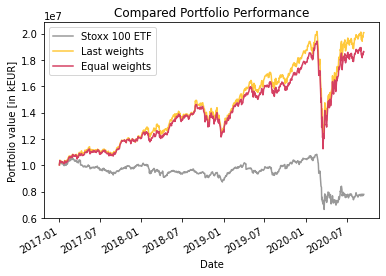

------------------------------
Data Table:
------------------------------
* Table output was shrtened to 50 rows.

Date                   Stoxx 100 ETF    Last weights    Equal weights
-------------------  ---------------  --------------  ---------------
2017-01-02 00:00:00    10057646.6599   10022776.4223    10023125.9116
2017-01-03 00:00:00    10176330.9596   10214069.0157    10172706.8693
2017-01-04 00:00:00    10213631.7396   10393989.2039    10351955.3709
2017-01-05 00:00:00    10159376.0597   10318995.8798    10276470.9117
2017-01-06 00:00:00    10179721.9396   10253867.3958    10232316.0723
2017-01-09 00:00:00    10145812.1397   10280247.1160    10259596.0964
2017-01-10 00:00:00    10172939.9797   10255481.6053    10252582.8837
2017-01-11 00:00:00    10206849.7796   10301377.3957    10293201.6498
2017-01-12 00:00:00    10115293.3198   10219789.4067    10219157.0842
2017-01-13 00:00:00    10196676.8396   10271488.8477    10262171.3539
2017-01-16 00:00:00    10128857.2397   102558

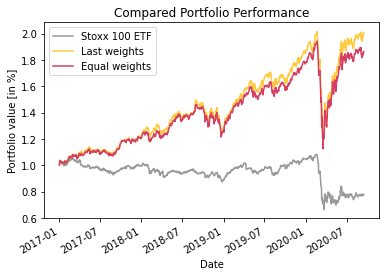

------------------------------
Data Table:
------------------------------
* Table output was shrtened to 50 rows.

Date                   Stoxx 100 ETF    Last weights    Equal weights
-------------------  ---------------  --------------  ---------------
2017-01-02 00:00:00           1.0058          1.0023           1.0023
2017-01-03 00:00:00           1.0176          1.0214           1.0173
2017-01-04 00:00:00           1.0214          1.0394           1.0352
2017-01-05 00:00:00           1.0159          1.0319           1.0276
2017-01-06 00:00:00           1.0180          1.0254           1.0232
2017-01-09 00:00:00           1.0146          1.0280           1.0260
2017-01-10 00:00:00           1.0173          1.0255           1.0253
2017-01-11 00:00:00           1.0207          1.0301           1.0293
2017-01-12 00:00:00           1.0115          1.0220           1.0219
2017-01-13 00:00:00           1.0197          1.0271           1.0262
2017-01-16 00:00:00           1.0129         

In [14]:
# Define initial investment to simulate value changes of portfolios
initial_investment = 10000000

ETF_returns = pd.DataFrame(STOXX100ETF_returns)

# Define weights for the underlying stocks of the portfolios
last_weights = STOXX100_properties.T['Weighting'].to_dict()
equal_weights = PF_weights(STOXX100_returns, '1/N')
etf_weights = np.array([1])

# Calculate values of each portfolio
PF_value_ETF = PF_value_with_rebalancing(ETF_returns, etf_weights, initial_investment)
PF_value_last_weights = PF_value_with_rebalancing(STOXX100_returns, last_weights, initial_investment)
PF_value_equal_weights = PF_value_with_rebalancing(STOXX100_returns, equal_weights, initial_investment)

# Merge the performance of all portfolios into one dataframe to compare between them
merged = PF_value_ETF[['PF Total']].merge(PF_value_last_weights[['PF Total']], left_index=True, right_index=True, how='inner')
merged.rename(columns={'PF Total_x':'Stoxx 100 ETF', 'PF Total_y':'Last weights', }, inplace=True)
merged = merged.merge(PF_value_equal_weights[['PF Total']], left_index=True, right_index=True, how='inner')
merged.rename(columns={'PF Total':'Equal weights'}, inplace=True)


# Plot, print and export (as excel) results
print('Performance of STOXX100 ETF compared to underlying equities with equal weights latest STOCC100 weights):\n')
custom_plot(merged, style='one', title='Compared Portfolio Performance', ylabel='Portfolio value [in kEUR]')
print('Daily return data of the three portfolios:')
custom_plot(merged/initial_investment, style='one', title='Compared Portfolio Performance', ylabel='Portfolio value [in %]')
print_nice_data_tables(merged.pct_change().iloc[1:])

export_dict = {'COMPARISON Value':merged, 'COMPARISON Value':merged.pct_change().iloc[1:],'PF last weights':PF_value_last_weights, 'PF equal weights':PF_value_equal_weights, 'ETF PF':PF_value_ETF, 'INPUT Stock Prices':STOXX100, 'INPUT Stock Prices':STOXX100, 'INPUT ETF Price': STOXX100ETF, 'INPUT Stock last weights': pd.DataFrame(zip(STOXX100.columns, last_weights))}
excel_exporter(export_dict, file='results/assignment_1-exercise_1a.xlsx')

<b>Answer:</b><br>
The differences between the constant weighted portfolio and the naive portfolio are only marginal. In particular, during the two downturns in the first and last quarter of 2018 as well as during the recent Corona crisis, the values of the two were barely apart although huge market movements could be observed. The constant weighted portfolio achieved a slightly higher portfolio value during the recent quarters.
<br>
<br>However, the differences between the Xtrackers ETF and the other two portfolios are much greater. While the constant weighted and equal weighted portfolios gained strongly in value during the overall time horizon and also experienced pronounced setbacks during the two downturns in 2018 and the Corona crisis, the Stoxx ETF shows only a minimal gain in value during the period and, relative to its own performance, small setbacks during the two downturns in 2018, but also a strong setback during the Corona crisis


### 1 b)
Continue with the three portfolios from 1 a) and calculate their:
- Mean return,
- Volatility,
- Skewness,
- Maximum Drawdown, 
- Sharpe Ratio (assuming a risk-free rate of zero), and
- Investor’s Certainty Equivalent (assuming a log utility function).

For each quater from January 1st, 2018 till September 15th, 2020, also compare the portfolio return, volatility, maximum drawdown and Sharpe Ratio.
By comparing the quarterly results, elaborate whether the portfolio with the latest weights (as of September 16th, 2020) would have performed better than the actual ETF or the "naive" strategy and describe the observed differences between the portfolios.


<br><b>Note:</b> We use arithmetic moments to keep them comparable with the package PyPortfolioOpt. We scale the return, standard deviation, and volatility up to per annum (p.a.) with 252 days and use one degree of freedom for standard deviation and volatility.

The development of the different key figures:




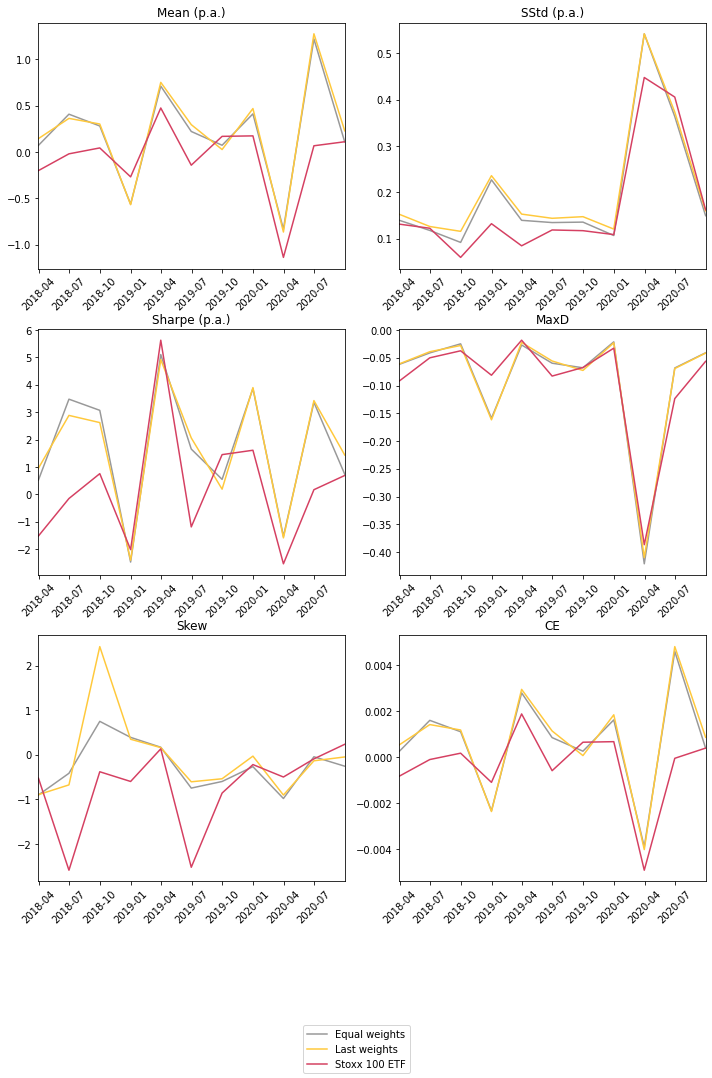

------------------------------
Data Tables:
------------------------------

Mean (p.a.):
              Equal weights    Last weights    Stoxx 100 ETF
----------  ---------------  --------------  ---------------
2018-03-31           0.0728          0.1456          -0.1997
2018-06-30           0.4090          0.3637          -0.0189
2018-09-30           0.2818          0.3032           0.0449
2018-12-31          -0.5617         -0.5677          -0.2673
2019-03-31           0.7123          0.7525           0.4759
2019-06-30           0.2226          0.2962          -0.1414
2019-09-30           0.0740          0.0276           0.1698
2019-12-31           0.4127          0.4701           0.1750
2020-03-31          -0.8328         -0.8628          -1.1366
2020-06-30           1.2211          1.2770           0.0682
2020-09-30           0.1095          0.2294           0.1117


SStd (p.a.):
              Equal weights    Last weights    Stoxx 100 ETF
----------  ---------------  -------------

In [15]:
# Convert PF Values to returns
PFs_daily_returns = merged.pct_change()
PFs_daily_returns.iloc[0] = merged.iloc[0] / initial_investment - 1

# Prepare DataFrames to store the results
cols = ['Rolling last PF', 'Rolling naive PF', 'Rolling ETF', 'Qrt last PF', 'Qrt naive PF', 'Qrt ETF']
results_moments_q = {}
results_moments_d = {}

# Calculate quaterly moments from January 1st, 2018 till September 15th, 2020
for date, partial_df in df_date_period_iterator(PFs_daily_returns.loc['2018-01-01':'2020-09-15'], period='q', true_date=True):
    tmp = pd.DataFrame(moments(partial_df, output=['Mean (p.a.)', 'SStd (p.a.)', 'Sharpe (p.a.)', 'MaxD', "Skew", "CE"]))
    tmp = tmp.rename({'Stoxx PF weighted':'Qrt last PF', 'Stoxx PF equal weighted':'Qrt naive PF', 'Stoxx ETF':'Qrt ETF'})
    results_moments_q[date] = tmp

reuslts_moments = transpose_dict_DF(results_moments_q, [('head', 'dict_key'),('head', 'index')])


# Print and export (as excel) results
print('The development of the different key figures:\n\n')
custom_plot(reuslts_moments)

exp_results = reuslts_moments.copy()
exp_results['DATA'] = PFs_daily_returns
excel_exporter(reuslts_moments, 'results/assignment_1-exercise_1b.xlsx')

<b>Answer:</b> 
The portfolio with the last weights has outperformed the ETF portfolio for most of the period. Only during the downturn at the end of 2018 and in Q3 2019 did it show a lower mean return than the ETF. The "naive" portfolio, on the other hand, recorded almost the same mean return as the portfolio with the latest weights and therefore outperformed the ETF equally.
 
In terms of volatility, the "naive" portfolio and the portfolio with the latest weights also showed almost exactly the same volatility. However, it is striking that both portfolios were more volatile than the ETF over the entire period. This increased volatility was particularly evident in the downturn in late 2018/early 2019 and even more so during the corona crisis. During the late 2018 downturn, the volatility of the ETF increased only very slightly, whereas it also increased very strongly during the corona crisis, but less than the latest weight portfolio and the "naive" strategy.
 
With regard to the Sharpe Ratio, it should be noted that the trend of all three portfolios is similar. Only the strength of the respective direction is varying. For example, the Sharpe Ratio of all portfolios falls equally sharply during the downturn at the end of 2018 as well as during the corona crisis and then rises sharply again after each drop.

Looking at the maximum drawdown of the three portfolios during the individual quarters, it can be seen that the MDD of the last weights portfolio and the "naive" portfolio again follow a quite similar trend. Especially during the downturn at the end of 2018/ the beginning of 2019, the two portfolios recorded their first major drawdowns. It is noticable that the ETF portfolio also experienced a larger drawdown at this point, but it was less pronounced. From Q2 2019 onwards, all three portfolios show a very similar drawdown pattern. Here it is striking that, particularly during the Corona crisis, all three portfolios experienced roughly equal drawdowns. This shows in particular that even the ETF portfolio has suffered heavy losses.

The analysis of the quarterly indicators therefore shows that the last weights portfolio has outperformed the ETF in particular, but only marginally, if at all, outperformed the "naive" portfolio.

## Exercise 2
### 2 a)
With the stock price data from January 1st, 2017 till December 31st, 2017<br>

1. find the efficient portfolio weights with PyPortfolioOpt's Efficient Frontier function maximizing the Sharpe Ratio and <br><i>-> weights_raw</i>
2. find the efficient portfolio weights with the constraint that every stock's weight needs to be at least 1%. <br><i>-> weights_adj</i><br>

Report for both of them the in-sample (January 1st, 2017 till December 31st, 2017) estimates for:
- realized portfolio returns, 
- volatility, and 
- Sharpe Ratio.

Then use these two set of weights to create two portfolios and compare them with the ETF PF, the naive PF, and the PF with the weights as of September 16th, 2020 using the time frame from January 1st, 2018 till March 31st, 2018 (daily rebalancing) and estimate for all:
- returns, 
- volatilities
- maximum drawdown, and 
- Sharpe Ratios.

What do you observe?

In [16]:
## Calculate weights based on period from Januaray 1st, 2017 till December 31st, 2017
sample_data = STOXX100_returns.loc['2017-01-01':'2017-12-31']
weights_raw = PF_weights(sample_data, 'MSR', min_weight_constraint=False)
weights_adj = PF_weights(sample_data, 'MSR', min_weight_constraint=0.01)

# Print In-Sample estimates
r_f = 0

mom_r = moments(PF_value_with_rebalancing(sample_data, weights_raw, rebalancing='daily', percentage=True), output=['Mean (p.a.)', 'Std (p.a.)', 'Sharpe (p.a.)'], r_f=0).loc['PF Total'].rename('PF raw weights')
mom_a = moments(PF_value_with_rebalancing(sample_data, weights_adj, rebalancing='daily', percentage=True), output=['Mean (p.a.)', 'Std (p.a.)', 'Sharpe (p.a.)'], r_f=0).loc['PF Total'].rename('PF adjusted weights')
mom_merged = pd.concat([mom_r, mom_a], axis=1)

print('Different key figures for the portfolios for the first IS period from Jan 2017 - Dec 2017:\n')
print_nice_data_tables(mom_merged, heading=False)

Different key figures for the portfolios for the first IS period from Jan 2017 - Dec 2017:

                 PF raw weights    PF adjusted weights
-------------  ----------------  ---------------------
Mean (p.a.)              0.5196                 0.2542
Std (p.a.)               0.0980                 0.1082
Sharpe (p.a.)            5.2895                 2.3453



In [17]:
# Calculate Out-of-sample PFs
OOS_data = STOXX100_returns.loc['2018-01-01':'2018-03-31']

PF_raw = PF_value_with_rebalancing(OOS_data, weights_raw, rebalancing='daily', percentage=True)['PF Total']
PF_adj = PF_value_with_rebalancing(OOS_data, weights_adj, rebalancing='daily', percentage=True)['PF Total']
PF_equal = PF_value_with_rebalancing(OOS_data, equal_weights, rebalancing='daily', percentage=True)['PF Total']
PF_last = PF_value_with_rebalancing(OOS_data, last_weights, rebalancing='daily', percentage=True)['PF Total']
PF_ETF = PF_value_with_rebalancing(ETF_returns.loc['2018-01-01':'2018-03-31'], etf_weights, rebalancing='daily', percentage=True)['PF Total']

merged2 = pd.concat([PF_raw, PF_adj, PF_equal, PF_last, PF_ETF], axis=1)
merged2.columns = ['PF_raw', 'PF_adj', 'PF_equal', 'PF_last', 'PF_ETF']
OOS_moments = moments(merged2, r_f=r_f, output=['Mean (p.a.)','SStd (p.a.)','MaxD','Sharpe (p.a.)'])

print('Different key figures for the portfolios for the OOS period from Jan 2018 - Mar 2018:\n')
print_nice_data_tables(OOS_moments, heading=False)

Different key figures for the portfolios for the OOS period from Jan 2018 - Mar 2018:

            Mean (p.a.)    SStd (p.a.)     MaxD    Sharpe (p.a.)
--------  -------------  -------------  -------  ---------------
PF_raw           0.0235         0.1416  -0.0925           0.1660
PF_adj           0.0905         0.1451  -0.0662           0.6235
PF_equal         0.0728         0.1395  -0.0618           0.5215
PF_last          0.1456         0.1525  -0.0609           0.9545
PF_ETF          -0.1997         0.1313  -0.0918          -1.5217



In [18]:
# Export results
weights = pd.concat([pd.Series(weights_raw).rename('RAW weights'), pd.Series(weights_adj).rename('Adj weights'), pd.Series(last_weights).rename('Last weights'), pd.Series(equal_weights).rename('Equal weights')], axis=1)
export_dict = {'DATA in-sample': sample_data, 'DATA out-of-sample': OOS_data, 'In-Sample Moments':mom_merged, 'OOS Moments': OOS_moments, 'Weights': weights}
excel_exporter(export_dict, 'results/assignment_1-exercise_2a.xlsx')


<b>Answer:</b> As we can see from the above moments comparison for the five portfolios in the first quarter 2018, the actual weighted portfolio still performs best with the highest Sharpe Ratio. Using the new weights calculated from the maximum Sharpe Ratio (MSR) optimization did not improve the portfolio performance. In addition, after adjusting the portfolio weights with minimum weights of 1% leads to better performance with a higher sharpe ratio than the raw weights. 


### 2 b)
Continue the approach from task 2a) for every quarter beginning with the one from 2a). After every quarter optimize both PFs (raw & adjusted) and use the new weights for the next quarter. Compare them with the ETF PF, the naive PF, and the PF with the weights as of September 16th, 2020. Compare the calculations quarterly in terms of:
- returns, 
- volatilities
- maximum drawdown, and 
- Sharpe Ratios.

Additionally, output the PF weights of the raw and adjusted portfolios.

*<b>Note:</b> The minimum weight per stock was changed to 0.5% from the original question due to technical problems with the optimizer*

In [19]:
# New code
backtesting_data = STOXX100_returns.loc['2018-01-01':]
tmp_return_data = STOXX100_returns.loc['2017-01-01':'2017-12-31']

tmp_weights_raw = PF_weights(tmp_return_data, 'MSR', min_weight_constraint=False)
tmp_weights_adj = PF_weights(tmp_return_data, 'MSR', min_weight_constraint=0.005)
#print(tmp_weights_adj)#
weights_raw = pd.DataFrame(columns=tmp_weights_raw.keys())
weights_raw.index.name = 'Date'
weights_adj = pd.DataFrame(columns=tmp_weights_adj.keys())
weights_adj.index.name = 'Date'
#weights_raw = weights_raw.append(pd.Series(tmp_weights_raw).rename(dt.datetime(2018, 12, 31)))
#weights_adj = weights_adj.append(pd.Series(tmp_weights_adj).rename(dt.datetime(2018, 12, 31)))

moments_summary = {}

for date, partial_df in df_date_period_iterator(backtesting_data, period='q', true_date=True):

    tmp_pf_raw = PF_value_with_rebalancing(partial_df, tmp_weights_raw, percentage=True)['PF Total'].rename('PF_raw')
    tmp_pf_adj = PF_value_with_rebalancing(partial_df, tmp_weights_adj, percentage=True)['PF Total'].rename('PF_adj')
    tmp_pf_equal = PF_value_with_rebalancing(partial_df, equal_weights, percentage=True)['PF Total'].rename('PF_equal')
    tmp_pf_last = PF_value_with_rebalancing(partial_df, last_weights, percentage=True)['PF Total'].rename('PF_last')
    tmp_pf_ETF = PF_value_with_rebalancing(ETF_returns.loc[partial_df.index.min():partial_df.index.max()], etf_weights, percentage=True)['PF Total'].rename('PF_etf')
    # ToDo: ETF perod selection with min and max seems wrong
    
    tmp_merged = pd.concat([tmp_pf_raw, tmp_pf_adj, tmp_pf_equal, tmp_pf_last, tmp_pf_ETF], axis=1)
    tmp_moments = moments(tmp_merged, output=['Mean (p.a.)','SStd (p.a.)','MaxD','Sharpe (p.a.)'], r_f=r_f)
    moments_summary[date] = tmp_moments
    
    # Save weights
    weights_raw = weights_raw.append(pd.Series(tmp_weights_raw).rename(date))
    weights_adj = weights_adj.append(pd.Series(tmp_weights_adj).rename(date))

    # Calc new weights for new period
    tmp_weights_raw = PF_weights(partial_df, 'MSR', min_weight_constraint=False)
    tmp_weights_adj = PF_weights(partial_df, 'MSR', min_weight_constraint=0.005)



moments_summary = transpose_dict_DF(moments_summary, [('head', 'dict_key'),('head', 'index')])
#print(moments_summary)

/opt/venv/lib/python3.7/site-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/opt/venv/lib/python3.7/site-packages/pypfopt/risk_models.py:88: UserWarning: Could not fix matrix. Please try a different risk model.
  warnings.warn("Could not fix matrix. Please try a different risk model.")
/opt/venv/lib/python3.7/site-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/opt/venv/lib/python3.7/site-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/opt/venv/lib/python3.7/site-packages/pypfopt/risk_models.py:88: UserWarning: Could not fix matrix.

Different key figures for all 5 portfolios:


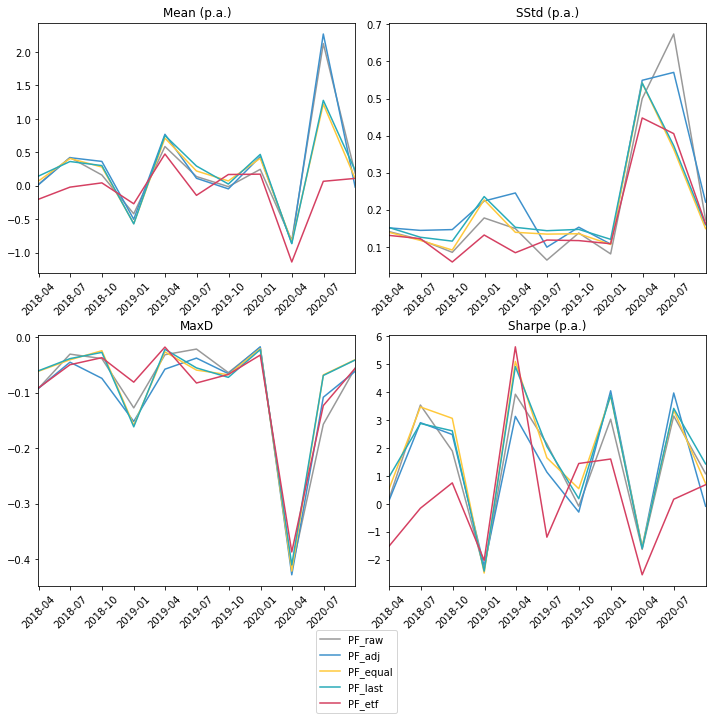

------------------------------
Data Tables:
------------------------------

Mean (p.a.):
              PF_raw    PF_adj    PF_equal    PF_last    PF_etf
----------  --------  --------  ----------  ---------  --------
2018-03-31    0.0235    0.0160      0.0728     0.1456   -0.1997
2018-06-30    0.4243    0.4213      0.4090     0.3637   -0.0189
2018-09-30    0.1625    0.3653      0.2818     0.3032    0.0449
2018-12-31   -0.4174   -0.4994     -0.5617    -0.5677   -0.2673
2019-03-31    0.5876    0.7703      0.7123     0.7525    0.4759
2019-06-30    0.1392    0.1134      0.2226     0.2962   -0.1414
2019-09-30   -0.0112   -0.0447      0.0740     0.0276    0.1698
2019-12-31    0.2469    0.4367      0.4127     0.4701    0.1750
2020-03-31   -0.8138   -0.8569     -0.8328    -0.8628   -1.1366
2020-06-30    2.1247    2.2679      1.2211     1.2770    0.0682
2020-09-30    0.1872   -0.0183      0.1095     0.2294    0.1117


SStd (p.a.):
              PF_raw    PF_adj    PF_equal    PF_last    PF_etf


In [20]:
# Draw results
print('Different key figures for all 5 portfolios:')
custom_plot(moments_summary)

exp_dict = moments_summary.copy()
exp_dict['DATA OOS'] = backtesting_data
exp_dict['DATA first'] = tmp_return_data
exp_dict['RAW weights'] = weights_raw
exp_dict['ADJ weights'] = weights_adj
excel_exporter(exp_dict, 'results/assignment_1-exercise_2b.xlsx')

<b>Answer:</b> From the charts above we can see yearly volatility of the portfolio performance. In terms of Sharpe Ratio, in 2018 the MSR portfolios did not perform significantly better than the other three portfolios. Instead, the naive portfolio and the actual weight portfolio behaved comparably better, while the ETF portfolio has the worst performance. 

In 2019, the two MSR portfolios performed worst among the five portfolios, while the ETF portfolio recovered from the downside and performed best except for the third quarter in 2019.

In 2020, the ETF portfolio fell into troughs again while the adjusted MSR portfolio has performed relatively well and arrived a peak in the third quarter.

<b>

## Exercise 3
Use the same rolling windows and precedure as from exercise 2b).
### 3 a)
Calculate a risk parity strategy inverse volatility PF and compare its performace with the Efficient Frontier (Max Sharpe Ratio) portfolio regarding their:
- realized returns,
- volatilities,
- maximum drawdown, and 
- Sharpe Ratio.

Does the simple risk parity strategy of an inverse volatility weighting improve the risk profile compared to Markowitz optimization?<br>

### 3 b)
Calculate a minimum variance PF and compare its performace with the Efficient Frontier (Max Sharpe Ratio) portfolio regarding their:
- realized returns,
- volatilities,
- maximum drawdown, and 
- Sharpe Ratio.

Does the minimum volatility strategy improve the risk profile compared to Markowitz optimization and the simpler inverse volatility weighted portfolio? 

As discussed during the tutorials we used 0.5%.
The function used from the pypfopt library to calculate the covariance matrix sometimes delivers values slightly under 0.5% although it was specified as a constraint in the formula. This is due to the fact we input daily returns and the pypfopt covariance matrix cannot properly deal with non-positive values:<br>
/opt/venv/lib/python3.7/site-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.<br>
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."<br>
/opt/venv/lib/python3.7/site-packages/pypfopt/risk_models.py:88: UserWarning: Could not fix matrix. Please try a different risk model.<br>
  warnings.warn("Could not fix matrix. Please try a different risk model.")

In [21]:
## Doing 3a and 3b together here
backtesting_data = STOXX100_returns.loc['2018-01-01':]
tmp_return_data = STOXX100_returns.loc['2017-01-01':'2017-12-31']

# Check for NaN
#print(tmp_return_data[tmp_return_data.isna().any(axis=1)])

# First weights
tmp_weights_IVola = PF_weights(tmp_return_data, 'IVola')
tmp_weights_EF = PF_weights(tmp_return_data, 'EF')
tmp_weights_MVol = PF_weights(tmp_return_data, 'MVol')


weights_IVola = pd.DataFrame(columns=tmp_weights_IVola.keys())
weights_IVola.index.name = 'Date'
weights_EF = pd.DataFrame(columns=tmp_weights_EF.keys())
weights_EF.index.name = 'Date'
weights_MVol = pd.DataFrame(columns=tmp_weights_MVol.keys())
weights_MVol.index.name = 'Date'
#weights_IVola = weights_IVola.append(pd.Series(tmp_weights_IVola).rename(dt.datetime(2018, 12, 31)))
#weights_EF = weights_EF.append(pd.Series(tmp_weights_EF).rename(dt.datetime(2018, 12, 31)))
#weights_MVol = weights_MVol.append(pd.Series(tmp_weights_MVol).rename(dt.datetime(2018, 12, 31)))

moments_summary = {}

for date, partial_df in df_date_period_iterator(backtesting_data, period='q', true_date=True):
    tmp_pf_IVola = PF_value_with_rebalancing(partial_df, tmp_weights_IVola, percentage=True)['PF Total'].rename('Inverse Vola')
    tmp_pf_EF = PF_value_with_rebalancing(partial_df, tmp_weights_EF, percentage=True)['PF Total'].rename('Efficient Frontier')
    tmp_pf_MVol = PF_value_with_rebalancing(partial_df, tmp_weights_MVol, percentage=True)['PF Total'].rename('Minimum Volaitilty')
    
    tmp_merged = pd.concat([tmp_pf_IVola, tmp_pf_EF, tmp_pf_MVol], axis=1)
    tmp_moments = moments(tmp_merged, output=['Mean (p.a.)','SStd (p.a.)','MaxD','Sharpe (p.a.)'], r_f=r_f)
    moments_summary[date] = tmp_moments
    
    # Save weights
    weights_IVola = weights_IVola.append(pd.Series(tmp_weights_IVola).rename(date))
    weights_EF = weights_EF.append(pd.Series(tmp_weights_EF).rename(date))
    weights_MVol = weights_MVol.append(pd.Series(tmp_weights_MVol).rename(date))

    # Calc new weights for new period
    tmp_weights_IVola = PF_weights(partial_df, 'IVola')
    tmp_weights_EF = PF_weights(partial_df, 'EF')
    tmp_weights_MVol = PF_weights(partial_df, 'MVol')

moments_summary = transpose_dict_DF(moments_summary, [('head', 'dict_key'),('head', 'index')])

/opt/venv/lib/python3.7/site-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/opt/venv/lib/python3.7/site-packages/pypfopt/risk_models.py:88: UserWarning: Could not fix matrix. Please try a different risk model.
  warnings.warn("Could not fix matrix. Please try a different risk model.")
/opt/venv/lib/python3.7/site-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/opt/venv/lib/python3.7/site-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/opt/venv/lib/python3.7/site-packages/pypfopt/risk_models.py:88: UserWarning: Could not fix matrix.

Different key figures for the 3 portfolios:


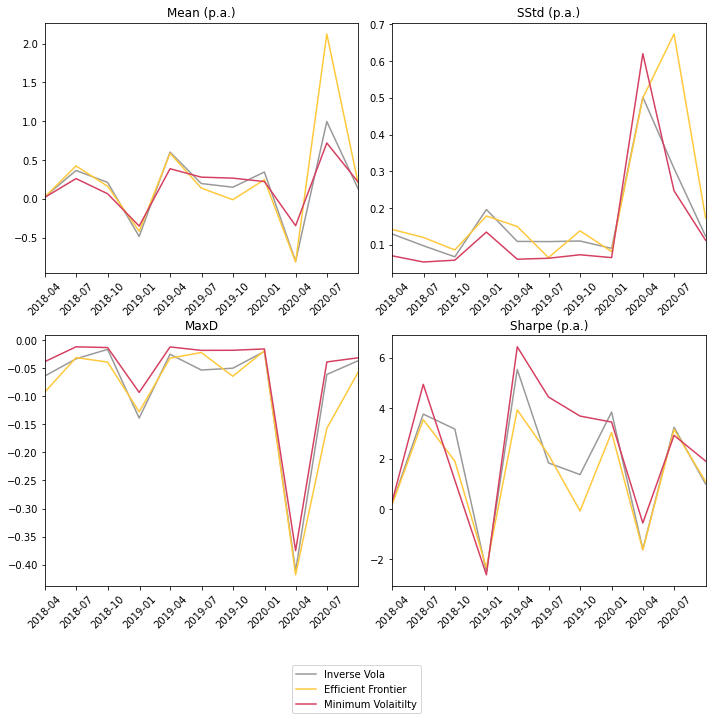

------------------------------
Data Tables:
------------------------------

Mean (p.a.):
              Inverse Vola    Efficient Frontier    Minimum Volaitilty
----------  --------------  --------------------  --------------------
2018-03-31          0.0258                0.0235                0.0195
2018-06-30          0.3656                0.4243                0.2610
2018-09-30          0.2121                0.1625                0.0658
2018-12-31         -0.4851               -0.4174               -0.3508
2019-03-31          0.6023                0.5876                0.3883
2019-06-30          0.1976                0.1392                0.2797
2019-09-30          0.1498               -0.0112                0.2669
2019-12-31          0.3458                0.2469                0.2231
2020-03-31         -0.8042               -0.8138               -0.3461
2020-06-30          0.9968                2.1247                0.7203
2020-09-30          0.1219                0.1872           

In [22]:
# Draw results
print('Different key figures for the 3 portfolios:')
custom_plot(moments_summary)

# Export results
exp_dict = moments_summary
exp_dict['DATA OOS'] = backtesting_data
exp_dict['DATA first'] = tmp_return_data
exp_dict['EF weights'] = weights_EF
exp_dict['MVOLA weights'] = weights_MVol
exp_dict['INV weights'] = weights_IVola
excel_exporter(exp_dict, "results/assignment_1-exercise_3.xlsx")

<b> Answer to 3a:</b> 

<u>Markowitz MSR portfolio vs inverse volatility</u>

For the given time period, OOS quarters 2018 Q1 to 2020 Q3, an overall improvement of the risk profile in terms of the portfolio volatility and maximum drawdown can be observed for the simple risk parity strategy of an inverse volatility weighting compared to Markowitz optimization. Further, an improvement for the Sharpe Ratio is realized at the same time. 

For a total of 11 quarters, the volatility of the inverse volatility portfolio is below the Markowitz portfolio in 7 quarters, with differences ranging between 8% to 54% (of the Markowitz portfolio). In the remaining 4 quarters, Markowitz’s volatility was below the inverse portfolio with 0,05% to 40% (of the inverse volatility portfolio). The biggest improvement of the risk profile through an inverse volatility portfolio in terms of volatility can be found in the second quarter of 2020 concerning the period right after the COVID-19 crisis first hit the global economies. 

Out of 11 quarters, the MDD of the Markowitz Portfolio is below the inverse volatility portfolio in 7 cases, meaning that it suffered bigger drawdowns in these quarters. 

The risk-adjusted returns, measured with the Sharpe Ratio per annum, of the inverse volatility portfolio is higher compared to Markowitz in 8 quarters, significantly higher in 4 quarters, being 66% above the Markowitz portfolio in 2018 Q3.


<b>Answer to 3b:</b> 

<u>Minimum volatility vs Markowitz MSR portfolio vs inverse volatility</u>

The minimum volatility portfolio significantly improves the risk profile in terms of volatility and MDD compared to the Markowitz and the inverse volatility portfolio. The portfolio’s Sharpe Ratio over the quarters is the highest for a total of 6 quarters.  

The minimum volatility portfolio has the lowest volatility for nearly the whole period. The difference to the other two portfolios is also rather large, being on average 30% below the inverse volatility portfolio. An exception for the risk performance can be observed for 2020 Q1, the quarter in which the COVID-19 crisis hit. 

The MDD is the highest thought the period for the minimum volatility portfolio, indicating relatively small drawdowns. 

In a total of 7 quarters, the minimum volatility has the highest Sharpe Ratio p. a., being on average 31% above the inverse volatility portfolio. 


<b>Conclusion for exercise 3:</b> 
-	Inverse volatility and minimum volatility portfolio improve the risk profile and achieve improved Sharpe Ratios over the observed period. 
-	Given the observations, the minimum volatility portfolio performs better in terms of risk and risk-adjusted returns compared to the inverse volatility portfolio and therefore appears to be a better alternative for risk-averse investors. 
-	Potential drawback of the inverse volatility portfolio is the solely assessment of the asset’s stand-alone standard deviation, which does not consider the correlations and effects of weighting on the portfolio’s volatility. 
-	For all portfolio optimization exercises, the OOS performance can only be as good as the behavior and movements of assets follow the approximated patterns, which are derived from the IS periods. 
-	An interesting observation is that the minimum volatility portfolio had the highest volatility in 2020 Q1. As just mentioned, the estimation with 4 quarters as the IS period did not sufficiently capture tail risk and increased volatility, leaving the portfolio exposed to unexpected volatility. However, the market movements were captured for the weight optimization of the next quarter and allowed for the minimum volatility portfolio to achieve the lowest standard deviation in 2020 Q2.
